In [1]:
import cv2
import numpy as np
import os
import sys
sys.path.append('../../src')
import DISData as DD
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
doUT = DD.SQL()

host:  192.168.0.128
user:  diadmin
password:  ········


SQL connection done


In [3]:
data_name = 'AIhub_EyeMovement'

In [4]:
query = f'''select label, count(label) as count from DeepInSight.{data_name}_IR_landmark_info group by label;'''

In [5]:
db = doUT.db
conn = doUT.conn
conn.execute(query)
column_names = [desc[0] for desc in conn.description]
result = conn.fetchall()
db.commit()

In [6]:
df = pd.DataFrame(result, columns=column_names)
df['count'] = df['count'].astype('int64')

In [7]:
df = df.sort_values(by='count')
df

,label,count
4,right_center,637108
7,right_pupil,637678
6,right_iris,638032
3,left_pupil,639251
2,left_iris,639401
0,left_center,639804
5,right_eyelid,648193
1,left_eyelid,649702


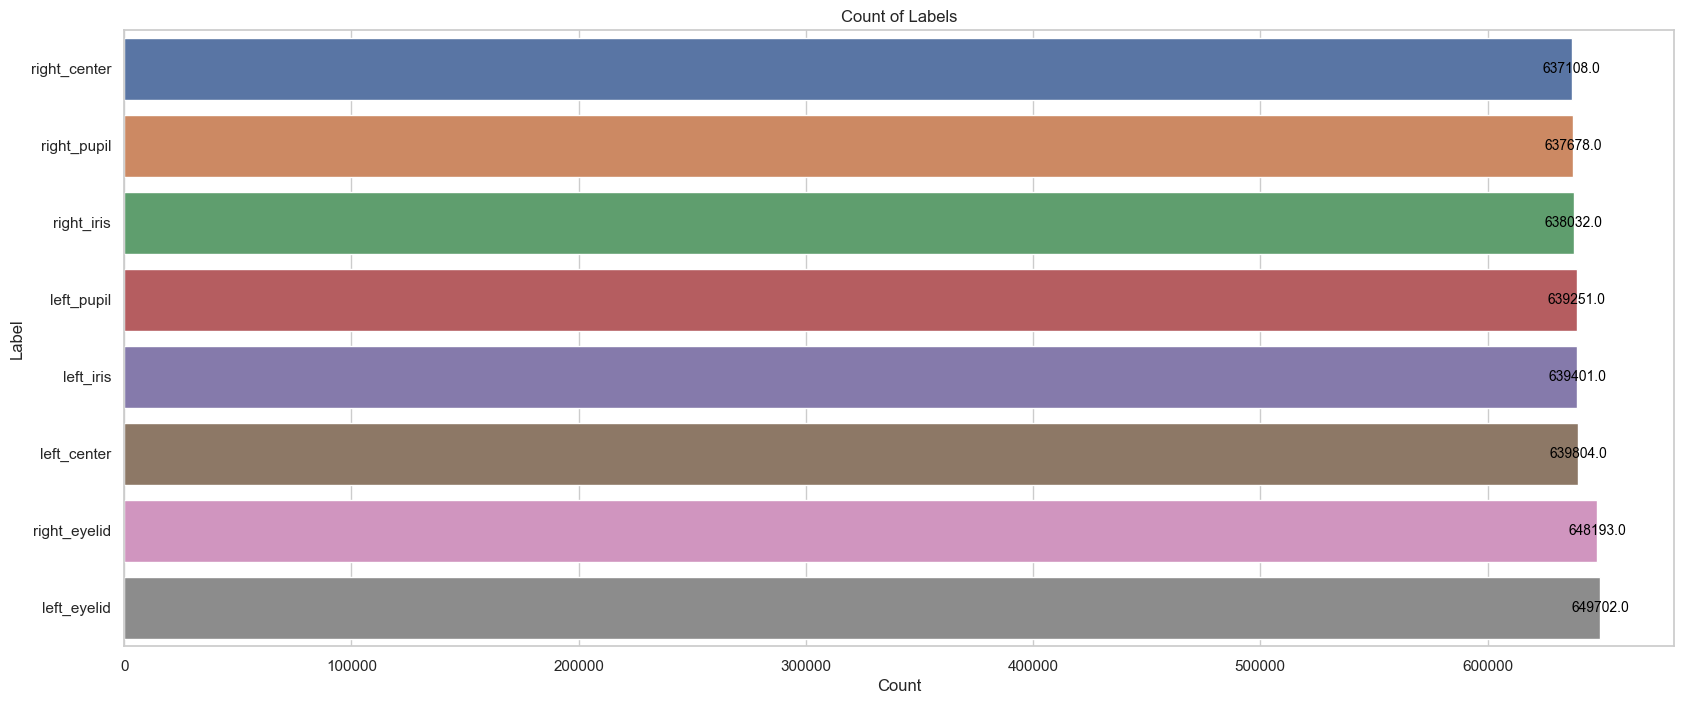

In [9]:
try:
    plt.figure(figsize=(20, 8))
    sns.set(style="whitegrid")
    ax = sns.barplot(x='count', y='label', data=df, hue='label')
    for p in ax.patches:
        count = p.get_width()  # 막대의 너비를 가져와서 count로 사용
        label = p.get_y() + p.get_height() / 2  # 막대의 y 좌표를 가져와서 label로 사용
        ax.annotate(f'{count}', (count, label), ha='center', va='center', fontsize=10, color='black')
    plt.xlabel('Count')
    plt.ylabel('Label')
    plt.title('Count of Labels')
    save_path = f'label/{data_name}_IR_label.png'
    if not os.path.exists('label'):
        os.makedirs('label')
    if os.path.exists(save_path):
        os.remove(save_path)
    plt.savefig(save_path)
except Exception as e:
    print(e)

In [ ]:
doUT.connect_end()